In [16]:
import cv2
import numpy as np
import pandas as pd
import scipy.stats as st
#from sklearn.nodel_selection import train_test_split

mean = []
std = []
var = []
skew = []
kurtosis = []
y = []
coords = pd.DataFrame()

listay = []
listax = []
listawy = []
listawx = []



region = []

data2 = pd.DataFrame()
data = pd.DataFrame()

def sliding_window(image, stepSize, windowSize):
    # slide a window across the image
    for y in range(0, image.shape[0], stepSize):
        for x in range(0, image.shape[1], stepSize):
            # yield the current window
            yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])


def stats(image):
    mean_temp = np.mean(image)
    std_temp = np.std(image)
    var_temp = np.var(image)
    #skew_temp = st.skew(image)
    #kurtosis_temp = st.kurtosis(image)
    
    mean.append(mean_temp)
    std.append(std_temp)
    var.append(var_temp)
    #skew.append(skew_temp)
    #kurtosis.append(kurtosis_temp)


if __name__ == '__main__':
    #images = ["n0114.jpg","n0053.jpg"]
    images = ["n0035.jpg"]
    
    
    for i in images:
        image = cv2.imread('monos\\' + i)

             # Personaliza el tamaño de la ventana deslizante
        (winW, winH) = (100,100)
             # Tamaño del paso
        stepSize = 100
        for (x, y, window) in sliding_window(image, stepSize=stepSize, windowSize=(winW, winH)):
            # if the window does not meet our desired window size, ignore it
            if window.shape[0] != winH or window.shape[1] != winW:
                continue
            # since we do not have a classifier, we'll just draw the window
            #clone = image.copy()
            #cv2.rectangle(clone, (x, y), (x + winW, y + winH), (0, 255, 0), 2)
            #cv2.namedWindow('Window', cv2.WINDOW_NORMAL)
            #cv2.imshow("Window", clone)
            #cv2.waitKey(20)

            slice = image[y:y+winH,x:x+winW]
            stats(slice)
            #print(y,y+winH,x,x+winW)
            listay.append(y)
            listawy.append(y+winH)
            listax.append(x)
            listawx.append(x+winW)
            #cv2.namedWindow('sliding_slice',0)
            #cv2.imshow('sliding_slice', slice)
            #cv2.waitKey(20)

            #region.append(int(input()))
            
    ##con data es para utilizar kmeans y data2 es pana naive bayes 
    data["mean"] = mean  
    data["std"] = std
    data["variance"] = var
    #data["skewness"] = skew
    #data["Kurtosis"] = kurtosis

In [ ]:
image.shape#tamaño imagen

In [ ]:
data.count()#este no se ocupa
len(listawy)

In [ ]:
image[0:100,0:100].shape#no

In [ ]:
len(region)#no

In [ ]:
i = np.zeros((300,450,3),) ###no
i = i.astype(np.uint8)
i[0:100,0:100] = 255
i[10:110,0:100] = 87

In [2]:
data

,mean,std,variance
0,216.620833,28.401327,806.635399
1,212.980833,28.157068,792.820466
2,209.250000,27.466753,754.422500
3,205.503333,26.388034,696.328322
4,201.878333,25.030852,626.543531
...,...,...,...
1653721,72.772500,40.151680,1612.157410
1653722,74.350833,40.299951,1624.086083
1653723,76.145000,40.393964,1631.672308
1653724,78.130000,40.399832,1632.146433


In [ ]:
from skimage import io
import numpy as np
io.imshow(i)

In [ ]:
a = np.zeros((100,100,3),)###no
a = a.astype(np.uint8)
a[a == 0] = 87

In [ ]:
b = np.zeros((100,100,3),)##no
b = b.astype(np.uint8)
b[b == 0] = 167

In [ ]:
c = np.zeros((100,100,3),)###no
c = c.astype(np.uint8)
c[c == 0] = 209

In [ ]:
a = np.append(a,[b,c])##no
a.shape

In [ ]:
a = a.reshape(300,100,3)##no

In [ ]:
from skimage import io
import numpy as np
io.imshow(a)

In [3]:
from sklearn.cluster import KMeans 


In [ ]:
datos = list(zip(data["mean"],data["std"]))####no


In [4]:
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=3).fit(data)
data["Region"] = kmeans.labels_
data["y"] = listay
data["wy"] = listawy
data["x"] = listax
data["wx"] = listawx
####Clasificacion no supervisada
#clases, son 3 clases, calculando distancia de los puntos

In [5]:
data

,mean,std,variance,Region,y,wy,x,wx
0,216.620833,28.401327,806.635399,0,0,20,0,20
1,212.980833,28.157068,792.820466,0,0,20,1,21
2,209.250000,27.466753,754.422500,0,0,20,2,22
3,205.503333,26.388034,696.328322,0,0,20,3,23
4,201.878333,25.030852,626.543531,0,0,20,4,24
...,...,...,...,...,...,...,...,...
1653721,72.772500,40.151680,1612.157410,1,1580,1600,1041,1061
1653722,74.350833,40.299951,1624.086083,1,1580,1600,1042,1062
1653723,76.145000,40.393964,1631.672308,1,1580,1600,1043,1063
1653724,78.130000,40.399832,1632.146433,1,1580,1600,1044,1064


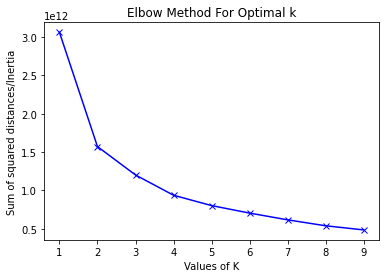

In [6]:
Sum_of_squared_distances = []###para saber cual es numero de clusters obtimos
K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [7]:
#data##no salton, numero de pixeles que corresponde a la imanege
image.shape

(1600, 1065, 3)

In [8]:
i = np.zeros((1600, 1065, 3),)#897, 866, 3),)#correspondiente al tamaño de cada imagen
i = i.astype(np.uint8)

In [9]:
for j in range(len(data)):
    y = data["y"][j]
    wy = data["wy"][j]
    x = data["x"][j]
    wx = data["wx"][j]
    
    if data["Region"][j] == 0:
        i[y:wy,x:wx] = 0
    elif data["Region"][j] == 1:
        i[y:wy,x:wx] = 255
    else:
        i[y:wy,x:wx] = 87

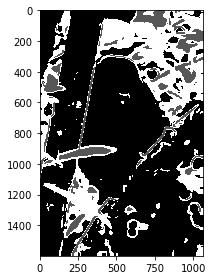

In [10]:
from skimage import io   
io.imshow(i)

In [13]:
data["Region"] = region
#data["y"] = listay
#data["wy"] = listawy
#data["x"] = listax
#data["wx"] = listawx
data

,mean,std,variance,Region
0,65.059300,43.701563,1909.826650,2
1,85.185600,54.839502,3007.370953,0
2,119.890733,65.653747,4310.414461,2
3,86.676800,56.913542,3239.151208,0
4,102.796167,77.130343,5949.089819,0
...,...,...,...,...
129,86.617167,45.031946,2027.876205,1
130,121.137767,56.313716,3171.234654,0
131,152.617067,29.359974,862.008095,0
132,164.585967,34.552936,1193.905410,0


In [14]:
x_train = data[["mean","std","variance"]]
y_train = data["Region"]

In [15]:
y_train

0      2
1      0
2      2
3      0
4      0
      ..
129    1
130    0
131    0
132    0
133    0
Name: Region, Length: 134, dtype: int64

In [17]:
x_test = data


In [18]:
x_test

,mean,std,variance
0,103.004867,46.315720,2145.145910
1,112.769800,45.040366,2028.634608
2,180.818733,56.604469,3204.065942
3,155.121600,42.519672,1807.922547
4,141.835133,51.396769,2641.627886
5,122.788567,64.808559,4200.149329
6,141.013667,49.656346,2465.752680
7,159.449700,46.264570,2140.410403
8,166.768933,56.315060,3171.385942
9,162.585267,50.181805,2518.213530


In [19]:
x_train

,mean,std,variance
0,65.059300,43.701563,1909.826650
1,85.185600,54.839502,3007.370953
2,119.890733,65.653747,4310.414461
3,86.676800,56.913542,3239.151208
4,102.796167,77.130343,5949.089819
...,...,...,...
129,86.617167,45.031946,2027.876205
130,121.137767,56.313716,3171.234654
131,152.617067,29.359974,862.008095
132,164.585967,34.552936,1193.905410


In [20]:
# Gaussian Naive Bayes
##clasificacion supervisada

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)   #funcion entrenamiento

y_pred = classifier.predict(x_test)

In [21]:
data["region"] = y_pred
data["y"] = listay
data["wy"] = listawy
data["x"] = listax
data["wx"] = listawx

In [22]:
image = cv2.imread('monos\\n0035.jpg')
image.shape

(576, 1024, 3)

In [23]:
i = np.zeros((576, 1024, 3),)
i = i.astype(np.uint8)

for j in range(len(data)):
    y = data["y"][j]
    wy = data["wy"][j]
    x = data["x"][j]
    wx = data["wx"][j]
    
    if data["region"][j] == 0:
        i[y:wy,x:wx] = 0
    elif data["region"][j] == 1:
        i[y:wy,x:wx] = 255
    else:
        i[y:wy,x:wx] = 87

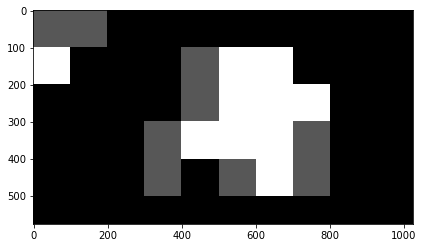

In [24]:
from skimage import io
io.imshow(i)

In [ ]:
data2

In [ ]:
##knn
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = 3
 
knn = KNeighborsClassifier(n_neighbors)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test2)

In [ ]:
x_test2 = x_test[["mean","std","variance"]]

In [ ]:
x_test2

In [ ]:
y_pred

In [ ]:
data["region"] = y_pred
data["y"] = listay
data["wy"] = listawy
data["x"] = listax
data["wx"] = listawx

In [ ]:
i = np.zeros((1600, 1065, 3),)
i = i.astype(np.uint8)

for j in range(len(data)):
    y = data["y"][j]
    wy = data["wy"][j]
    x = data["x"][j]
    wx = data["wx"][j]
    
    if data["region"][j] == 0:
        i[y:wy,x:wx] = 0
    elif data["region"][j] == 1:
        i[y:wy,x:wx] = 255
    else:
        i[y:wy,x:wx] = 87

In [ ]:
from skimage import io
io.imshow(i)